In [27]:
# Consider an American neighbourhood of N = 50 residents. Each resident
# identifies as democratic (D) or republican (R).
# The following four events can happen (with rates):

# A democratic randomly becomes republican, rate = 0.1D
# A republican randomly becomes democratic, rate = 0.1R
# A republican convinces a democratic to become republican, rate = 0.01DR
# A democratic convinces a republican to become democratic. rate = 0.01RD

# a
# Explain what the rates mean. Why are the ‘convincing‘ rates
# proportional to D · R?



In [28]:
# b
# Initialize a system with D = 25 and R = 25 and simulate the above
# rate system using the Gillespie method for 500,000 steps.


import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
D = 25
R = 25
total_steps = 500000

# Initialize time and population arrays
time_array = [0]
D_array = [D]
R_array = [R]

# Gillespie simulation
for step in range(total_steps):
    # Calculate rates
    rate_A = 0.1 * D
    rate_B = 0.1 * R
    rate_C = 0.01 * D * R
    rate_D = 0.01 * D * R
    
    total_rate = rate_A + rate_B + rate_C + rate_D
    
    if total_rate == 0:
        break  # Stop simulation if rates are zero
    
    # Calculate time step and event type
    delta_t = np.random.exponential(1 / total_rate)
    event = np.random.choice(['A', 'B', 'C', 'D'], p=[rate_A/total_rate, rate_B/total_rate, rate_C/total_rate, rate_D/total_rate])
    
    # Update populations based on event
    if event == 'A':
        D -= 1
        R += 1
    elif event == 'B':
        R -= 1
        D += 1
    elif event == 'C':
        R -= 1
        D -= 1
    elif event == 'D':
        D += 1
        R += 1
    
    # Append time and population data
    time_array.append(time_array[-1] + delta_t)
    D_array.append(D)
    R_array.append(R)




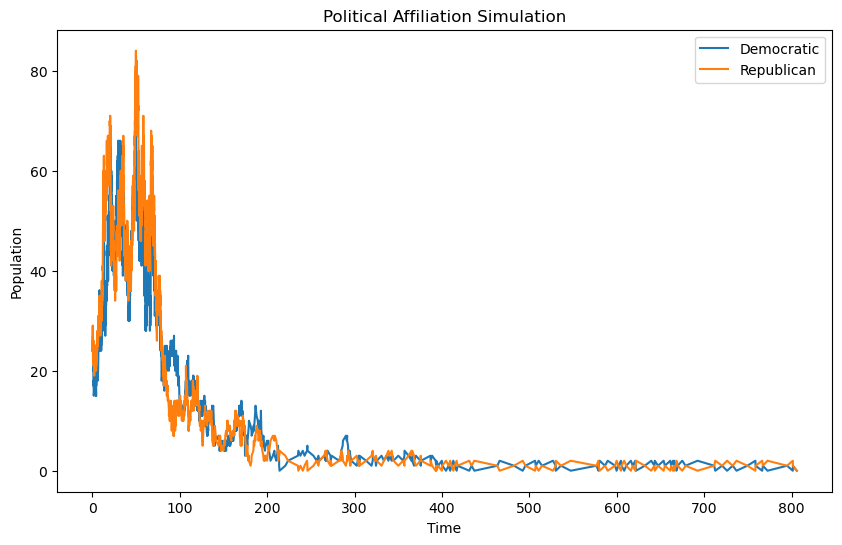

In [32]:
# c
# Plot D and R as a function of time and discuss the result.

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_array, D_array, label='Democratic')
plt.plot(time_array, R_array, label='Republican')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Political Affiliation Simulation')
plt.legend()
plt.show()

In [30]:
# We now introduce a third type of resident: undecided (U). The rules
# are then updated such that when someone is convinced to leave their
# party, they become undecided, and thus needs to be convinced twice to be
# converted to the other party. The random rates are thus

# A democratic randomly becomes undecided, rate = 0.1D
# A republican randomly becomes undecided, rate = 0.1R
# An undecided randomly becomes democratic, rate = 0.05U
# An undecided randomly becomes republican, rate = 0.05U

# and the convincing rates

# A republican convinces a democratic to become undecided, rate = 0.01DR
# A republican convinces an undecided to become republican, rate = 0.01UR
# A democratic convinces a republican to become undecided, rate = 0.01RD
# A democratic convinces an undecided to become democratic. rate = 0.01UD


# Initialize a system with R = 0, U = 50 and D = 0 and simulate the
# above rate system using the Gillespie method for 500,000 steps

# d





In [31]:
# Plot R and D as a function of time and discuss the result

# e